In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%load_ext watermark
%watermark -iv

pandas      0.22.0
matplotlib  2.2.2



In [3]:
df = pd.read_excel('reading.xlsx')
df.tail()

,Title,Author,Type,Read,Published,Pages,Notes,Reflection
520,The Red Atlas: How the Soviet Union Secretly M...,John Davies and Alexander J. Kent,Library,2018,2017.0,230.0,No,The Soviet Union undertook an impressive campa...
521,Jesus of Nazareth: The Infancy Narratives,Pope Benedict XVI,Audiobook,2018,2012.0,144.0,No,Pope Benedict's writing is beautiful and simpl...
522,Thomas Jefferson and the Tripoli Pirates: The ...,Brian Kilmeade and Don Yaeger,Audiobook,2018,2015.0,304.0,No,This book tells the tale of the first US milit...
523,Honey for a Child's Heart (Fourth Edition),Gladys Hunt,Book,2018,1969.0,231.0,No,This book made me excited to read to our kids!...
524,Robinson Crusoe,Daniel Defoe,Audiobook,2018,1719.0,288.0,No,I read an abridged version at some point growi...


In [4]:
table = pd.pivot_table(df,
                       index=['Type'],
                       columns=['Read'],
                       values=['Title'],
                       margins=True,
                       margins_name='Total',
                       aggfunc=[len])
table.columns = table.columns.droplevel(1)
table.columns = table.columns.droplevel(0)
table.fillna('')

Read,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Type,,,,,,,,,,,,,,
Audiobook,,,,,,5,,1,5,10,43.0,52.0,28.0,144
Book,13,14,17,22,26,19,31,36,33,25,23.0,29.0,10.0,298
Library,,,,,,,,3,4,1,7.0,10.0,14.0,39
PDF,,,,,,,,2,6,5,5.0,2.0,3.0,23
eBook,,,,,,,,,,,10.0,10.0,1.0,21
Total,13,14,17,22,26,24,31,42,48,41,88.0,103.0,56.0,525


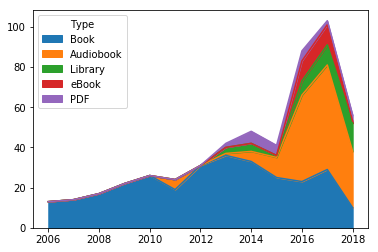

In [5]:
dfPlot = (df
 .groupby(['Read','Type'])
 .size()
 .unstack()
)
dfPlot = dfPlot[['Book','Audiobook','Library','eBook','PDF']]
dfPlot.plot.area()

plt.style.use('mag')
plt.gca().set_xlabel('')
plt.gca().xaxis.grid(False)
# plt.savefig('chart.png', dpi = 350)